## Classification of Meningioma Grade Using MRI Radiomic Features and Machine Learning

- Using machine learning, the project aims to classify meningioma grades using radiomics features.
- Radiomics features are derived from MRI scans collected from The Cancer Imaging Archive (TCIA), available at https://www.cancerimagingarchive.net/collection/meningioma-seg-class/ under a restricted license agreement.
- The dataset consists of 94 patients diagnosed with meningioma between 2010 and 2019. Meningiomas were categorized as Grade I or Grade II based on the 2016 WHO classification guidelines, with Grade III cases excluded due to their rarity.

### Outlines
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#pda">Preliminary Data Analysis</a></li>
<li><a href="#data std">Data Standardization</a></li>
<li><a href="#feat_select">Feature Selection</a></li>
<li><a href="#model_train">Model Training and Model Evaluation</a></li>
<li><a href="#model_imp">Hyperparameter Tuning</a></li>
<li><a href="#model_reeval">Evaluation of Tuned Models</a></li>
<li><a href="#model_comp">Comparing Models Performance</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>

## Introduction

- Meningioma, the most prevalent primary brain tumor, is categorized by the World Health Organization into grades I, II, or III, with grade I being benign, grade II atypical, and grade III anaplastic.
- The objective of this coursework is to employ machine learning to forecast the grade of meningioma using radiomics features.
- The "Target" column denotes the grade of meningioma, while the other columns comprise radiomics features extracted from MRI scans.

<a id='pda'></a>

## Preliminary Data Analysis

First, we will begin with exploratory analysis of the data to gain insights into the relationship between features as well as the variation in the distribution of these features between the two groups of subjects (Grade I and Grade II). We will also detect outliers and create some visuals of the data.

In [1]:
# import required libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load and read dataset
data = pd.read_csv("Dataset _01.csv")

# display the first few row of the dataset
data.head()

,Subjects,Grade,original_firstorder_Skewness_t1c,original_glrlm_HighGrayLevelRunEmphasis_t1c,wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-HLH_firstorder_Mean_t1c,wavelet-HLH_glszm_ZoneEntropy_t1c,wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c,...,original_glrlm_ShortRunHighGrayLevelEmphasis_t2f,wavelet-LHH_glszm_GrayLevelVariance_t2f,wavelet-LHH_glszm_SmallAreaEmphasis_t2f,wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis_t2f,wavelet-HLL_glrlm_LongRunHighGrayLevelEmphasis_t2f,wavelet-LHL_glrlm_LongRunHighGrayLevelEmphasis_t2f,wavelet-HLL_glrlm_RunEntropy_t2f,wavelet-LLH_glrlm_RunEntropy_t2f,wavelet-LHL_glrlm_LongRunLowGrayLevelEmphasis_t2f,wavelet-LLH_gldm_SmallDependenceEmphasis_t2f
0,Meningioma-SEG-CLASS-001,1,-0.202380,1.000000,0.500000,0.781250,0.625000,0.035199,1.584963,3.000000,...,0.183386,0.222222,0.333336,7.258789,15.252757,16.975874,2.819105,3.283991,6.025921,0.009225
1,Meningioma-SEG-CLASS-002,1,0.078198,3.998177,0.644970,0.792388,0.591837,0.002975,2.521641,2.384615,...,0.412566,0.213018,0.655983,12.879417,42.543773,35.485714,3.372202,3.737664,10.480360,0.005394
2,Meningioma-SEG-CLASS-003,0,-1.122465,3.970686,0.749135,0.755102,0.745000,0.005018,1.548795,2.500000,...,0.580900,0.245556,0.600261,9.280669,31.384120,25.073600,3.179709,3.700225,7.322684,0.005692
3,Meningioma-SEG-CLASS-004,0,-0.559125,3.970544,0.537190,0.531250,0.820000,-0.029598,2.324863,2.800000,...,0.163532,0.225922,0.505917,9.889856,29.793151,27.326205,3.308140,3.773040,8.183365,0.005711
4,Meningioma-SEG-CLASS-005,0,-0.854174,1.000000,0.739645,0.501730,0.755102,0.003390,2.128085,3.250000,...,0.505990,0.242215,0.590278,11.860141,36.602601,23.996250,3.482922,3.825040,7.443554,0.004615


In [3]:
# check the number of features and samples

print("No of features: ", data.shape[1])
print("No of samples: ", data.shape[0])

No of features:  50
No of samples:  94


In [4]:
# descriptive statistics of the data

data.describe()

,Grade,original_firstorder_Skewness_t1c,original_glrlm_HighGrayLevelRunEmphasis_t1c,wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-HLH_firstorder_Mean_t1c,wavelet-HLH_glszm_ZoneEntropy_t1c,wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c,wavelet-HHH_firstorder_Skewness_t1c,...,original_glrlm_ShortRunHighGrayLevelEmphasis_t2f,wavelet-LHH_glszm_GrayLevelVariance_t2f,wavelet-LHH_glszm_SmallAreaEmphasis_t2f,wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis_t2f,wavelet-HLL_glrlm_LongRunHighGrayLevelEmphasis_t2f,wavelet-LHL_glrlm_LongRunHighGrayLevelEmphasis_t2f,wavelet-HLL_glrlm_RunEntropy_t2f,wavelet-LLH_glrlm_RunEntropy_t2f,wavelet-LHL_glrlm_LongRunLowGrayLevelEmphasis_t2f,wavelet-LLH_gldm_SmallDependenceEmphasis_t2f
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,...,94.000000,94.000000,9.400000e+01,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,0.436170,-0.243500,2.899225,0.635435,0.623576,0.632099,0.002783,2.236178,2.489702,-0.065559,...,0.356015,0.232594,5.356573e-01,9.128278,29.574805,25.864903,3.188343,3.578411,7.785921,0.006517
std,0.498568,0.768804,1.438076,0.115019,0.107621,0.103743,0.007713,0.622811,0.411192,0.123249,...,0.218767,0.020321,1.701179e-01,2.654790,8.857305,7.693632,0.211179,0.216781,2.047935,0.001778
min,0.000000,-2.052332,1.000000,0.500000,0.500000,0.500000,-0.029598,1.000000,1.500000,-0.449264,...,0.090007,0.160000,7.650000e-08,2.404321,9.727375,11.357795,2.469126,2.652987,3.624379,0.004615
25%,0.000000,-0.774200,1.000000,0.535693,0.531336,0.537190,0.000156,1.849679,2.206818,-0.118660,...,0.148213,0.222222,4.542996e-01,7.289214,22.739840,20.538101,3.042866,3.472482,6.271558,0.005493
50%,0.000000,-0.243948,3.972175,0.618594,0.603306,0.623032,0.001359,2.250101,2.500000,-0.049542,...,0.345379,0.240000,5.874852e-01,9.458491,31.323187,25.725575,3.247389,3.613757,7.618922,0.005912
75%,1.000000,0.178430,3.994126,0.719002,0.702479,0.708371,0.003247,2.571382,2.795946,0.001109,...,0.498012,0.248106,6.493523e-01,10.430441,34.985642,30.404355,3.340362,3.722113,9.105742,0.006939
max,1.000000,2.244620,3.999413,0.950033,0.905000,0.871581,0.037356,4.478859,3.500000,0.335625,...,1.000336,0.250000,7.897026e-01,15.224847,51.529881,48.882039,3.504120,3.973320,13.499614,0.016829


In [5]:
# checking for data types and missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 50 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Subjects                                                94 non-null     object 
 1   Grade                                                   94 non-null     int64  
 2   original_firstorder_Skewness_t1c                        94 non-null     float64
 3   original_glrlm_HighGrayLevelRunEmphasis_t1c             94 non-null     float64
 4   wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c  94 non-null     float64
 5   wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c  94 non-null     float64
 6   wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c  94 non-null     float64
 7   wavelet-HLH_firstorder_Mean_t1c                         94 non-null     float64
 8   wavelet-HLH_glszm_ZoneEntropy_t1c         

Looking at the data structure, the first feature "subject" is not needed. Also, the variable "Grade" will be converted to categorical and not integer.

There are no missing values.

In [6]:
# convert grade variable to category
data["Grade"] = data["Grade"].astype("category")

# remove the subject column
data.drop("Subjects", inplace=True, axis=1)

# check the data information again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 49 columns):
 #   Column                                                  Non-Null Count  Dtype   
---  ------                                                  --------------  -----   
 0   Grade                                                   94 non-null     category
 1   original_firstorder_Skewness_t1c                        94 non-null     float64 
 2   original_glrlm_HighGrayLevelRunEmphasis_t1c             94 non-null     float64 
 3   wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c  94 non-null     float64 
 4   wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c  94 non-null     float64 
 5   wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c  94 non-null     float64 
 6   wavelet-HLH_firstorder_Mean_t1c                         94 non-null     float64 
 7   wavelet-HLH_glszm_ZoneEntropy_t1c                       94 non-null     float64 
 8   wavelet-HHL_glszm_HighGrayLevelZ

In [7]:
# count the number of subjects that belong to each grade of meningioma

data['Grade'].value_counts()

Grade
0    53
1    41
Name: count, dtype: int64

### Correlation between features

We will determine the relationship between the features of the dataset by examining positive and negative correlation.

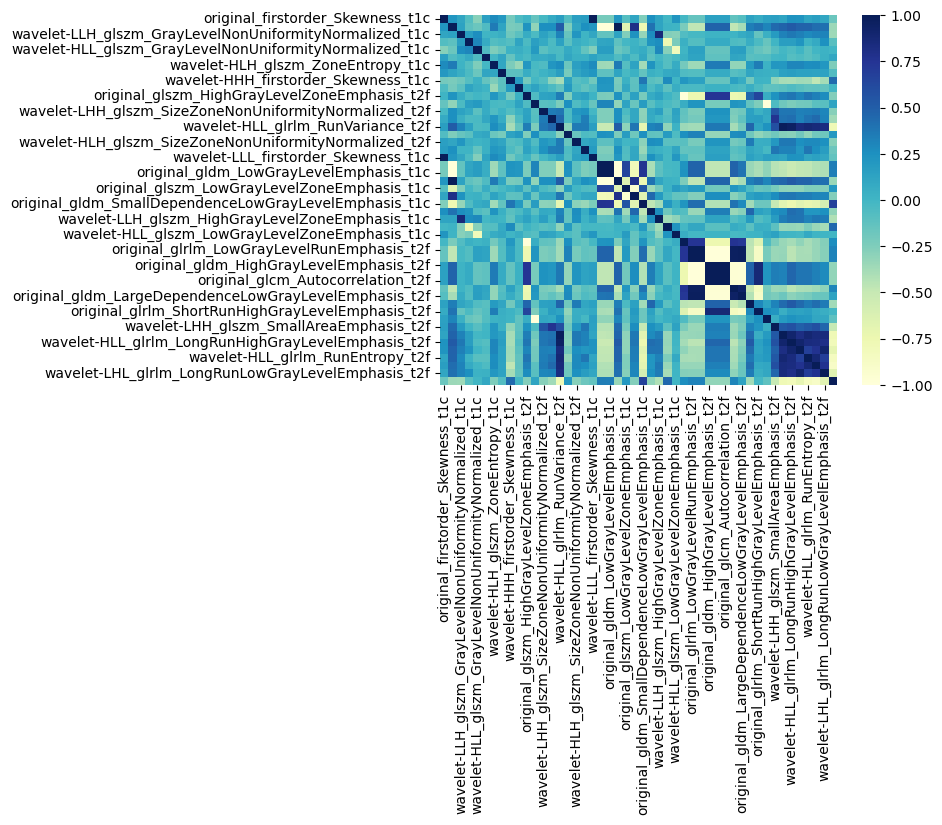

In [8]:
# obtain the correlation coefficients between the features
cols = [col for col in data.columns[1:]] # excluding the grade column

# visualize the heatmap of the correlation
sns.heatmap(data[cols].corr(), cmap="YlGnBu");

Due to the large features present in the dataset, not all the features can be visualized. Also, the heatmap is difficult to read and interpret. 

Therefore, we will restrict the correlation matrix to the top correlated pairs.

In [9]:
# Retain upper triangular values of correlation matrix and 
# make Lower triangular values Null 
upper_corr_mat = data[cols].corr().where( 
    np.triu(np.ones(data[cols].corr().shape), k=1).astype(np.bool_)) 
  
# Convert to 1-D series and drop Null values 
unique_corr_pairs = upper_corr_mat.unstack().dropna() 
  
# Sort correlation pairs 
sorted_corr = unique_corr_pairs.sort_values() 
  
sorted_corr

wavelet-LHH_glszm_GrayLevelVariance_t2f      wavelet-LHH_glszm_GrayLevelNonUniformityNormalized_t2f   -1.000000
original_glszm_LowGrayLevelZoneEmphasis_t2f  original_glszm_HighGrayLevelZoneEmphasis_t2f             -1.000000
original_glrlm_LowGrayLevelRunEmphasis_t1c   original_glrlm_HighGrayLevelRunEmphasis_t1c              -1.000000
original_gldm_HighGrayLevelEmphasis_t2f      original_gldm_LowGrayLevelEmphasis_t2f                   -1.000000
original_glcm_Autocorrelation_t2f            original_gldm_LowGrayLevelEmphasis_t2f                   -1.000000
                                                                                                         ...   
original_glcm_Autocorrelation_t1c            original_glrlm_HighGrayLevelRunEmphasis_t1c               0.999746
original_gldm_LowGrayLevelEmphasis_t2f       original_glrlm_LowGrayLevelRunEmphasis_t2f                0.999930
original_glcm_JointAverage_t2f               original_gldm_HighGrayLevelEmphasis_t2f                   1

In [10]:
# obtain the top 10 positive correlational pairs
sorted_corr.tail(10).sort_values(ascending=False)

original_glcm_Autocorrelation_t2f                      original_glcm_JointAverage_t2f                 1.000000
                                                       original_gldm_HighGrayLevelEmphasis_t2f        1.000000
original_glcm_JointAverage_t2f                         original_gldm_HighGrayLevelEmphasis_t2f        1.000000
original_gldm_LowGrayLevelEmphasis_t2f                 original_glrlm_LowGrayLevelRunEmphasis_t2f     0.999930
original_glcm_Autocorrelation_t1c                      original_glrlm_HighGrayLevelRunEmphasis_t1c    0.999746
original_gldm_LowGrayLevelEmphasis_t1c                 original_glrlm_LowGrayLevelRunEmphasis_t1c     0.999688
wavelet-LLL_firstorder_Skewness_t1c                    original_firstorder_Skewness_t1c               0.988326
wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis_t2f      wavelet-HLL_glrlm_RunVariance_t2f              0.983059
original_gldm_LargeDependenceLowGrayLevelEmphasis_t2f  original_gldm_LowGrayLevelEmphasis_t2f         0.976151
 

In [11]:
# obtain the top 10 negative correlational pairs
sorted_corr.head(10)

wavelet-LHH_glszm_GrayLevelVariance_t2f      wavelet-LHH_glszm_GrayLevelNonUniformityNormalized_t2f   -1.000000
original_glszm_LowGrayLevelZoneEmphasis_t2f  original_glszm_HighGrayLevelZoneEmphasis_t2f             -1.000000
original_glrlm_LowGrayLevelRunEmphasis_t1c   original_glrlm_HighGrayLevelRunEmphasis_t1c              -1.000000
original_gldm_HighGrayLevelEmphasis_t2f      original_gldm_LowGrayLevelEmphasis_t2f                   -1.000000
original_glcm_Autocorrelation_t2f            original_gldm_LowGrayLevelEmphasis_t2f                   -1.000000
original_glcm_JointAverage_t2f               original_gldm_LowGrayLevelEmphasis_t2f                   -1.000000
original_glcm_Autocorrelation_t1c            original_gldm_LowGrayLevelEmphasis_t1c                   -0.999996
original_glcm_Autocorrelation_t2f            original_glrlm_LowGrayLevelRunEmphasis_t2f               -0.999931
original_gldm_HighGrayLevelEmphasis_t2f      original_glrlm_LowGrayLevelRunEmphasis_t2f               -0

The top positive and negative correlated pair of features are shown above.

### Data Visualization

We will visualize the relationships observed between some of the features using scatterplot. Also, we will compare the distribution of the features between the two groups of subjects based on meningioma grade.

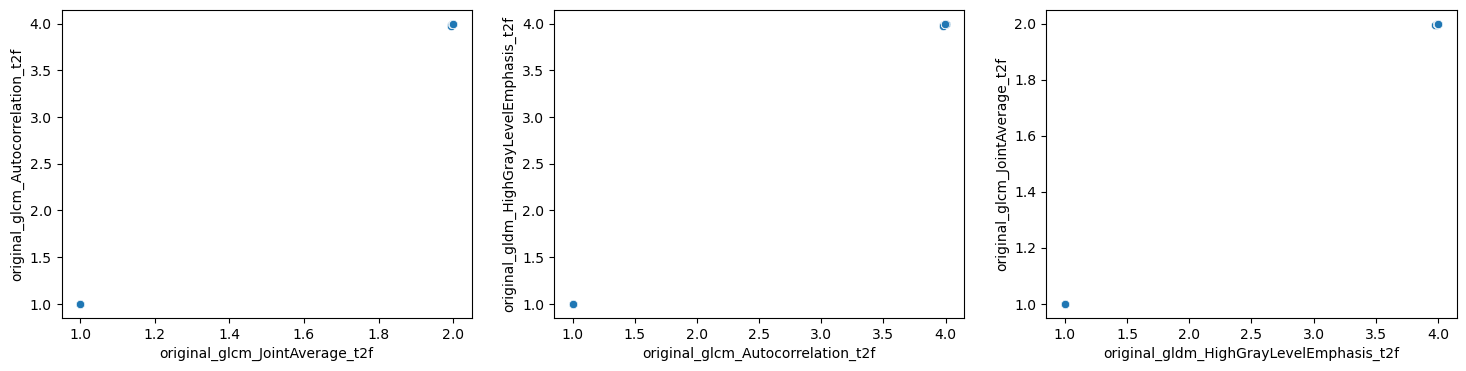

In [12]:
# relationship between positively related features

plt.figure(figsize=[18, 4])

plt.subplot(1, 3, 1)
sns.scatterplot(data = data, x = 'original_glcm_JointAverage_t2f', y = 'original_glcm_Autocorrelation_t2f')

plt.subplot(1, 3, 2)
sns.scatterplot(data = data, x = 'original_glcm_Autocorrelation_t2f', y = 'original_gldm_HighGrayLevelEmphasis_t2f')

plt.subplot(1, 3, 3)
sns.scatterplot(data = data, x = 'original_gldm_HighGrayLevelEmphasis_t2f', y = 'original_glcm_JointAverage_t2f');

As observed, the scatterplot isn't well displayed. Therefore, we will be adding a regression line to the plot to enable us to interprete the relationship between the features.

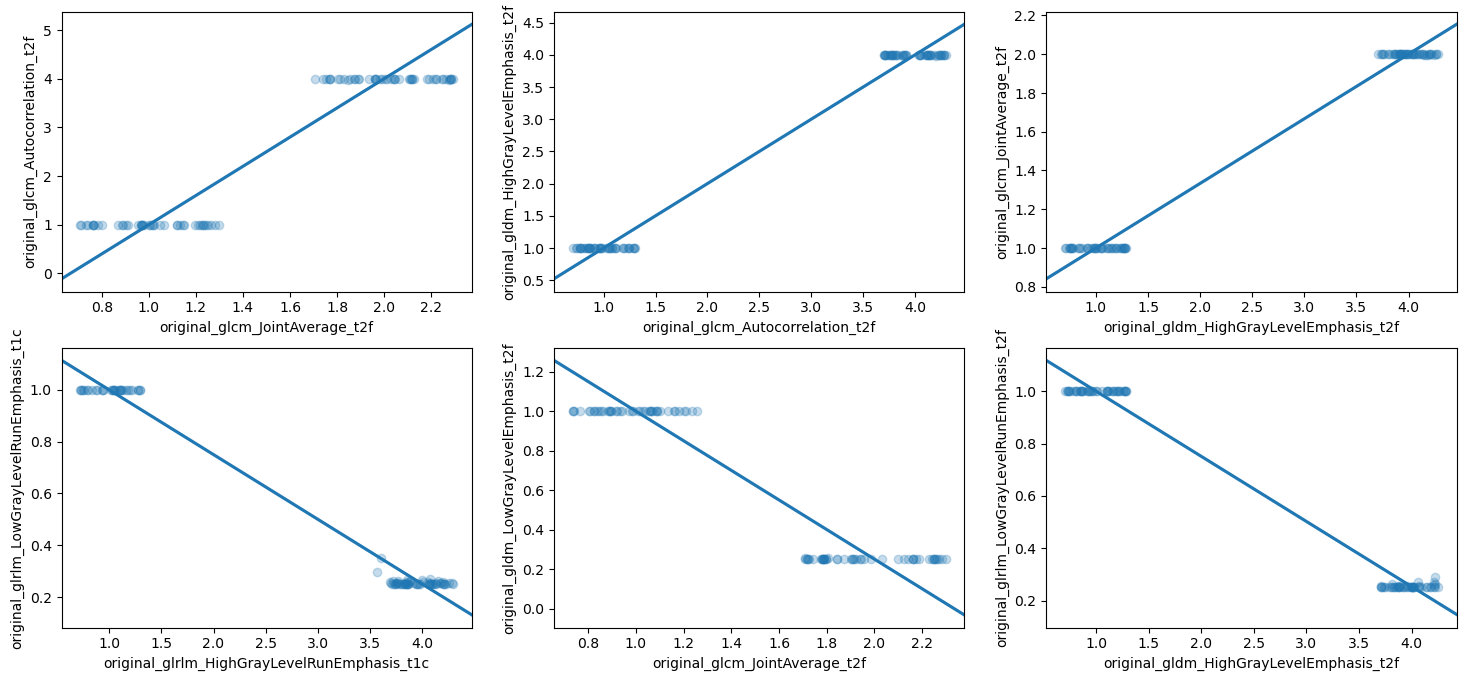

In [13]:
# relationship between positively related features.. jitter and transparency applied

plt.figure(figsize=[18, 8])

plt.subplot(2, 3, 1)
sns.regplot(data = data, x = 'original_glcm_JointAverage_t2f', y = 'original_glcm_Autocorrelation_t2f',
               truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/4})

plt.subplot(2, 3, 2)
sns.regplot(data = data, x = 'original_glcm_Autocorrelation_t2f', y = 'original_gldm_HighGrayLevelEmphasis_t2f',
               truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/4})

plt.subplot(2, 3, 3)
sns.regplot(data = data, x = 'original_gldm_HighGrayLevelEmphasis_t2f', y = 'original_glcm_JointAverage_t2f',
               truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/4})

# relationship between negatively related features.. jitter and transparency applied

plt.subplot(2, 3, 4)
sns.regplot(data = data, x = 'original_glrlm_HighGrayLevelRunEmphasis_t1c', y = 'original_glrlm_LowGrayLevelRunEmphasis_t1c',
               truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/4})

plt.subplot(2, 3, 5)
sns.regplot(data = data, x = 'original_glcm_JointAverage_t2f', y = 'original_gldm_LowGrayLevelEmphasis_t2f',
               truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/4})

plt.subplot(2, 3, 6)
sns.regplot(data = data, x = 'original_gldm_HighGrayLevelEmphasis_t2f', y = 'original_glrlm_LowGrayLevelRunEmphasis_t2f',
               truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/4});

We can clearly see the trend in the relationship between the features. Positively related features (top rows) show an increase in value of one feature as the other feature is increasing.

Meanwhile, for negative features (bottom rows), the increase in value of one feature is associated to the depreciation in the value of the other feature.

#### Comparing the distribution of features between the two groups of meningioma grade

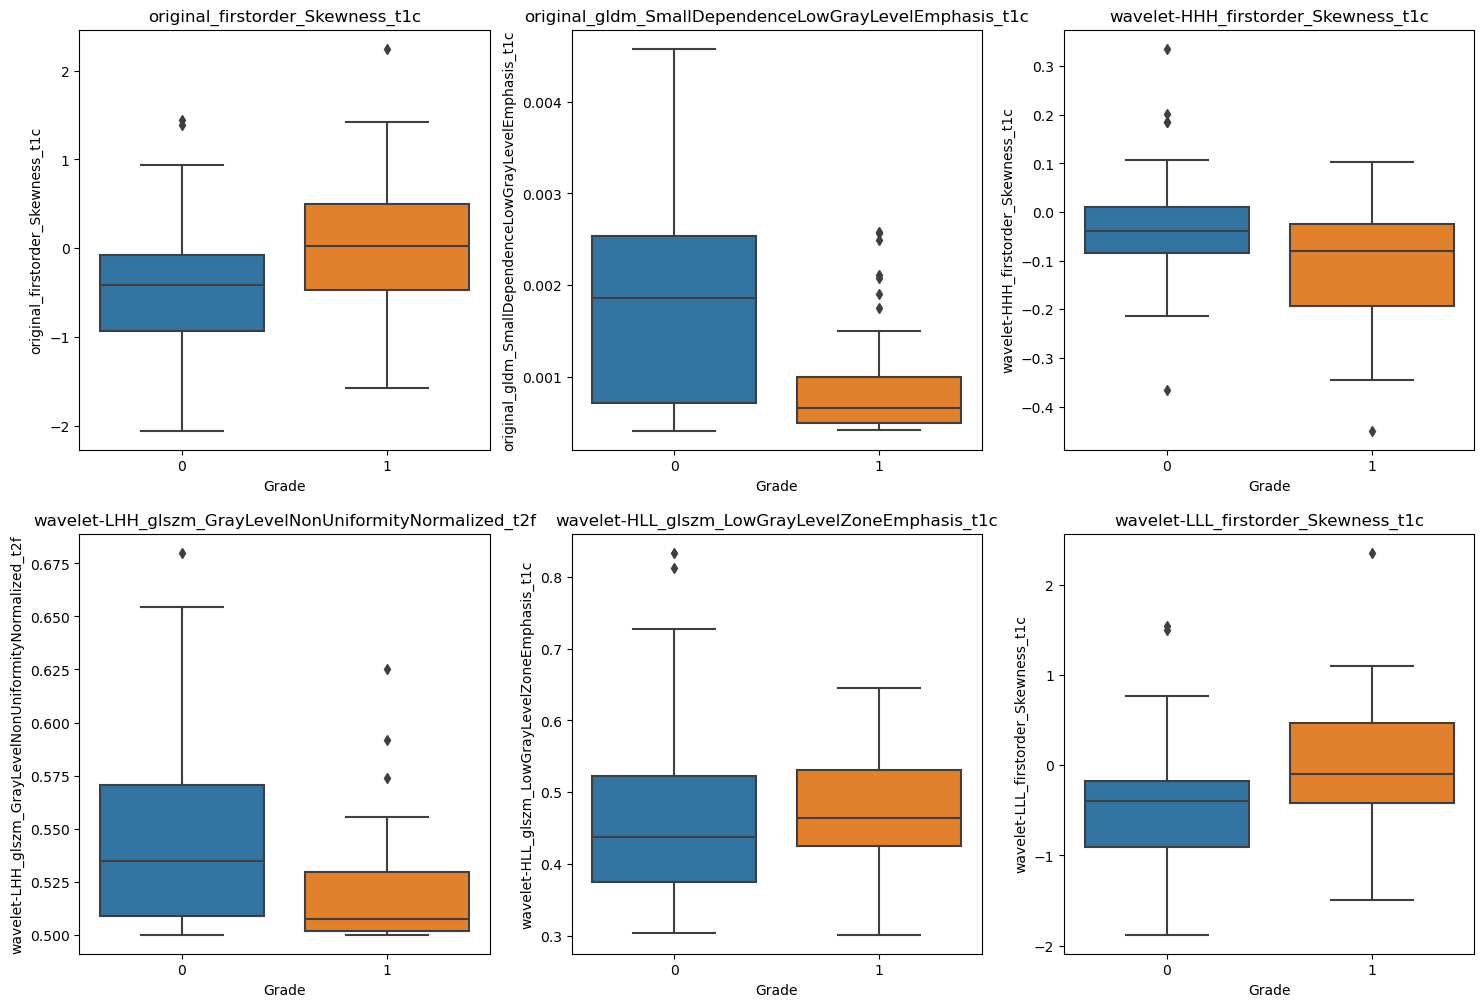

In [14]:
# set figure for the plots
plt.figure(figsize=[18, 12])

plt.subplot(2, 3, 1)
sns.boxplot(data = data, x = "Grade", y = 'original_firstorder_Skewness_t1c')
plt.title("original_firstorder_Skewness_t1c")

plt.subplot(2, 3, 2)
sns.boxplot(data = data, x = "Grade", y = 'original_gldm_SmallDependenceLowGrayLevelEmphasis_t1c')
plt.title("original_gldm_SmallDependenceLowGrayLevelEmphasis_t1c")

plt.subplot(2, 3, 3)
sns.boxplot(data = data, x = "Grade", y = 'wavelet-HHH_firstorder_Skewness_t1c')
plt.title("wavelet-HHH_firstorder_Skewness_t1c")

plt.subplot(2, 3, 4)
sns.boxplot(data = data, x = "Grade", y = 'wavelet-LHH_glszm_GrayLevelNonUniformityNormalized_t2f')
plt.title("wavelet-LHH_glszm_GrayLevelNonUniformityNormalized_t2f")

plt.subplot(2, 3, 5)
sns.boxplot(data = data, x = "Grade", y = 'wavelet-HLL_glszm_LowGrayLevelZoneEmphasis_t1c')
plt.title("wavelet-HLL_glszm_LowGrayLevelZoneEmphasis_t1c")

plt.subplot(2, 3,6)
sns.boxplot(data = data, x = "Grade", y = 'wavelet-LLL_firstorder_Skewness_t1c')
plt.title("wavelet-LLL_firstorder_Skewness_t1c");

The mean value of the features visualized are observed to be different between the two groups. For example, as seen in the first subplot of the plot above, subjects with meningioma status 0 (Grade I) were observed to have a lower mean value for original_firstorder_Skewness_t1c as compared to those with meningioma status 1 (Grade II). In contrast as seen in the third plot of first row, subjects with grade 0 (Grade I meningioma) were observed to have a higher mean value for wavelet-HHH_firstorder_Skewness_t1c than subjects with grade 1 (Grade II meningioma).

### Outlier Detection

From the boxplots generated above, it can be observed that there are outliers in the dataset. To remove the outliers, we will be using IQR (Inter Quartile Range) approach to finding the outliers. This the most commonly used and most trusted approach for removing outliers from dataset.

In [15]:
# detect outliers

def outliers_detection(data, feature):
    Q1 = data[feature].quantile(0.25) # calculate lower quartile
    Q3 = data[feature].quantile(0.75) # calculate upper qualtile
    IQR = Q3 - Q1 # interquartile range

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    index_ls = data.index[(data[feature] < lower) | (data[feature] > upper)] # obtain the index where an outlier is present

    return index_ls

In [16]:
# create an empty list and then store all the output indices from all columns

indices_list = []
for feature in data.columns[1:]:
    indices_list.extend(outliers_detection(data, feature))

In [17]:
# obtain the number of rows of data affected by outliers
len(set(indices_list))

56

There are 56 outliers out of 94 rows of the dataset. Although removing outliers are important, however the outliers found in this dataset is more than half of the data and therefore removing those outliers will make our data not very useful to train machine learning classification models.

<a id='data std'></a>
## Data Standardization


Data standardization entails adjusting the values of features or variables in a dataset to a uniform scale. This is crucial to ensure each feature's equal contribution to the model and to avoid domination by features with larger values.

In [18]:
# import StandardScaler and scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # create an instance of the standard scaler object

df_scaled = scaler.fit_transform(data[cols]) # fit and transform scaler on numeric features of the data
df_scaled = pd.DataFrame(df_scaled, columns=cols)

df_scaled.head() # display the head of the scaled data

,original_firstorder_Skewness_t1c,original_glrlm_HighGrayLevelRunEmphasis_t1c,wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c,wavelet-HLH_firstorder_Mean_t1c,wavelet-HLH_glszm_ZoneEntropy_t1c,wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c,wavelet-HHH_firstorder_Skewness_t1c,wavelet-HHH_glszm_SizeZoneNonUniformityNormalized_t1c,...,original_glrlm_ShortRunHighGrayLevelEmphasis_t2f,wavelet-LHH_glszm_GrayLevelVariance_t2f,wavelet-LHH_glszm_SmallAreaEmphasis_t2f,wavelet-HLL_glrlm_LongRunLowGrayLevelEmphasis_t2f,wavelet-HLL_glrlm_LongRunHighGrayLevelEmphasis_t2f,wavelet-LHL_glrlm_LongRunHighGrayLevelEmphasis_t2f,wavelet-HLL_glrlm_RunEntropy_t2f,wavelet-LLH_glrlm_RunEntropy_t2f,wavelet-LHL_glrlm_LongRunLowGrayLevelEmphasis_t2f,wavelet-LLH_gldm_SmallDependenceEmphasis_t2f
0,0.053772,-1.327752,-1.183809,1.472938,-0.068798,4.225206,-1.051214,1.247674,-0.096335,1.032770,...,-0.793332,-0.513114,-1.195679,-0.707971,-1.625646,-1.161570,-1.757838,-1.365426,-0.864011,1.531483
1,0.420683,0.768279,0.083350,1.576982,-0.390179,0.025080,0.460804,-0.256936,-0.925351,-0.322243,...,0.259888,-0.968491,0.711100,1.420546,1.472062,1.257195,0.875300,0.738565,1.322740,-0.635211
2,-1.149419,0.749060,0.993833,1.228673,1.094106,0.291318,-1.109596,0.025178,0.183125,0.016511,...,1.033479,0.641268,0.381793,0.057710,0.205369,-0.103403,-0.041108,0.564933,-0.227410,-0.466642
3,-0.412742,0.748962,-0.858737,-0.862474,1.820921,-4.220670,0.143159,0.758676,0.433273,-0.999749,...,-0.884569,-0.330097,-0.175758,0.288408,0.024784,0.190955,0.570318,0.902625,0.195111,-0.455680
4,-0.798576,-1.327752,0.910883,-1.138239,1.192003,0.079204,-0.174487,1.858922,0.082901,1.032770,...,0.689224,0.475976,0.322796,1.034549,0.797701,-0.244185,1.402405,1.143785,-0.168073,-1.075730


<a id='feat_select'></a>
## Feature Selection

- Feature selection is a preprocessing technique which involves selecting the best set of features to be used for training machine learning models.
- In this project, we will explore a filter based method (ANOVA coefficients) and a wrapper method (Backward feature selection).

### Filter Method - ANOVA Coefficients

One-way ANOVA coefficients is used as a filter method of feature selection because our input features are numerical while the target variable is categorical.

In [19]:
from sklearn.feature_selection import (
    f_classif,
    SelectFpr,
    SelectKBest,
)

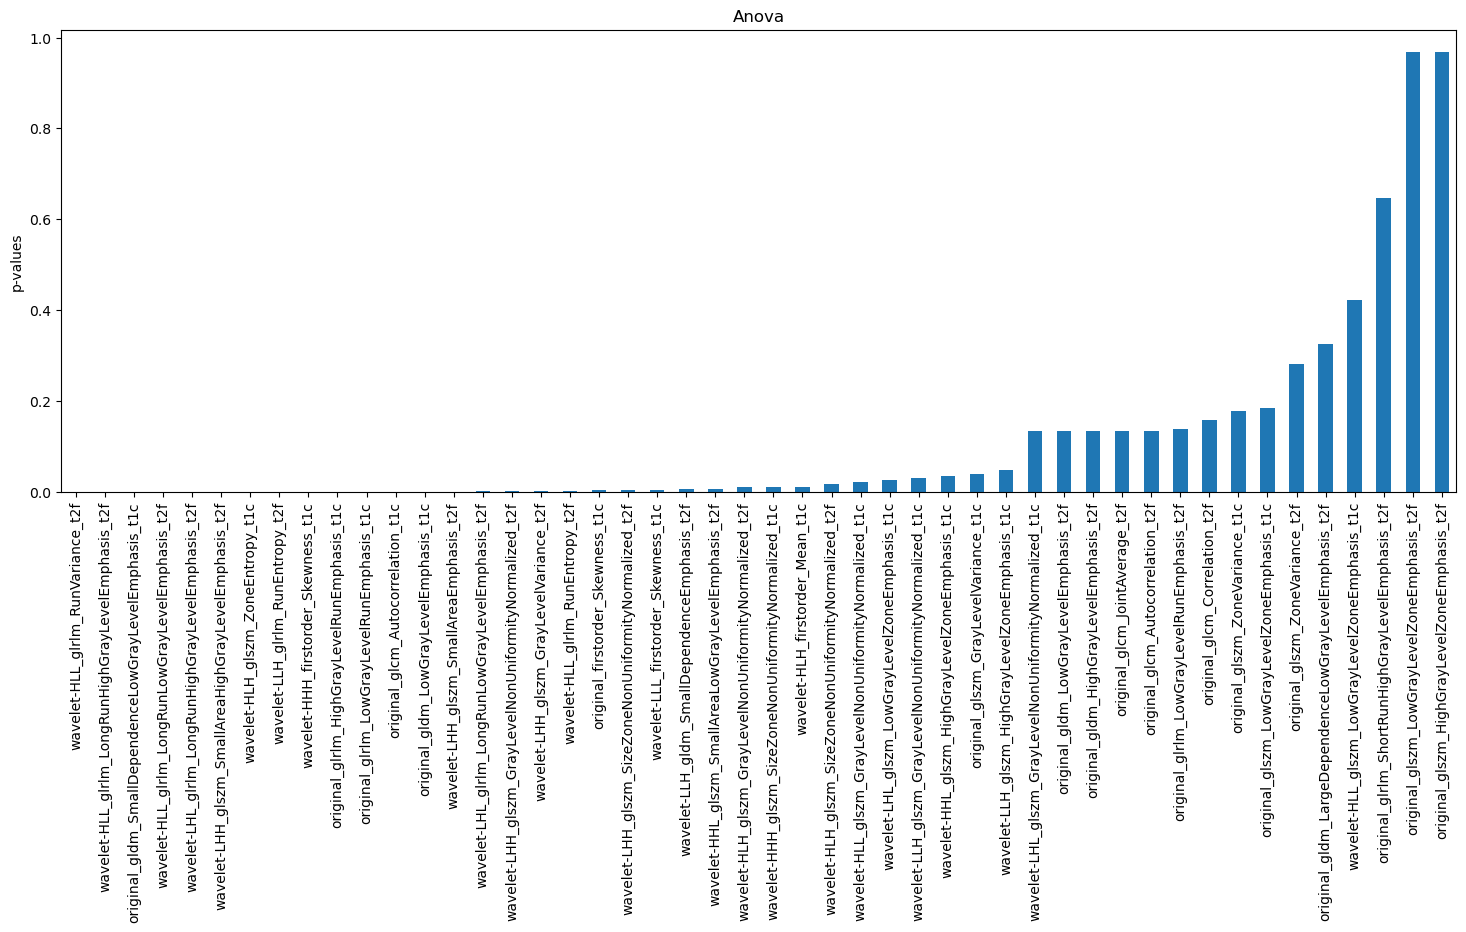

In [20]:
# select the input and target columns
X = df_scaled # we use the standardized features as our input
y = data["Grade"] # the target variable

# perform one-way ANOVA for all the features:
anova = f_classif(X, y)

# obtain the p-values in a pandas series
anova_coef = pd.Series(anova[1])
anova_coef.index = X.columns # add the variable names in the index

# sort the features based on their p-values, and make a bar plot
anova_coef.sort_values(ascending=True).plot.bar(figsize=(18, 6), rot=90) 
plt.ylabel("p-values")
plt.title("Anova");

- In the depicted graph, certain features exhibit p-values below 0.05.
- In such cases, we infer that there is a difference in the mean values of these features between grade I and grade II meningioma.
- Conversely, some features possess p-values exceeding 0.05, indicating similarity in mean values between the two grades.


Consequently, we will employ one-way ANOVA to identify features with p-values greater than 0.05 for further analysis.

In [21]:
# select features with p > 0.05
s_features = SelectFpr(f_classif, alpha=0.05).fit(X, y)

# print the number and the list of the selected features
print("Number of selected features: ", len(X.columns[s_features.get_support()]))
print(X.columns[s_features.get_support()])

Number of selected features:  33
Index(['original_firstorder_Skewness_t1c',
       'original_glrlm_HighGrayLevelRunEmphasis_t1c',
       'wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c',
       'wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c',
       'wavelet-HLH_firstorder_Mean_t1c', 'wavelet-HLH_glszm_ZoneEntropy_t1c',
       'wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c',
       'wavelet-HHH_firstorder_Skewness_t1c',
       'wavelet-HHH_glszm_SizeZoneNonUniformityNormalized_t1c',
       'wavelet-LHH_glszm_GrayLevelNonUniformityNormalized_t2f',
       'wavelet-LHH_glszm_SizeZoneNonUniformityNormalized_t2f',
       'wavelet-LHH_glszm_SmallAreaHighGrayLevelEmphasis_t2f',
       'wavelet-HLL_glrlm_RunVariance_t2f',
       'wavelet-HLH_glszm_GrayLevelNonUniformityNormalized_t2f',
       'wavelet-HLH_glszm_SizeZoneNonUniformityNormalized_t2f',
       'wavelet-HHL_glszm_SmallAreaLowGrayLevelEmphasis_t2f',
       'wavelet-LLL_firstorder_Skewness_t1c',
       'original_glr

We will be using only the selected features to build our classification model

### Wrapper Method - Backward feature elimination

- The BFE approach performs recursive feature elimination in each iteration until the criteria are met. The stopping criteria is defined, keeping both the performance and optimization of the search in mind.
- Although, it is computationally less efficient than forward feature selection. However, it can capture feature interactions as it starts training with the complete set of features.

In [22]:
# implementation of BFE with sklearn

from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier

# let us use a Random forest classifier to train models and a three-fold cross validation to avoid overfitting
bfe_fs = SFS(
    estimator=RandomForestClassifier(n_estimators=5, random_state=10),
    n_features_to_select='auto',
    tol=0.001, # define the threshold at which the search will stop
    direction='backward',
    scoring='roc_auc', # metric for evaluation is ROC-AUC
    cv=3,
)
bfe_fs = bfe_fs.fit(X, y)

In [23]:
# we can print out the names of the selected variables

print("Number of selected features: ", len(bfe_fs.get_feature_names_out()))
print(bfe_fs.get_feature_names_out())

Number of selected features:  47
['original_glrlm_HighGrayLevelRunEmphasis_t1c'
 'wavelet-LLH_glszm_GrayLevelNonUniformityNormalized_t1c'
 'wavelet-LHL_glszm_GrayLevelNonUniformityNormalized_t1c'
 'wavelet-HLL_glszm_GrayLevelNonUniformityNormalized_t1c'
 'wavelet-HLH_firstorder_Mean_t1c' 'wavelet-HLH_glszm_ZoneEntropy_t1c'
 'wavelet-HHL_glszm_HighGrayLevelZoneEmphasis_t1c'
 'wavelet-HHH_firstorder_Skewness_t1c'
 'wavelet-HHH_glszm_SizeZoneNonUniformityNormalized_t1c'
 'original_glszm_HighGrayLevelZoneEmphasis_t2f'
 'wavelet-LHH_glszm_GrayLevelNonUniformityNormalized_t2f'
 'wavelet-LHH_glszm_SizeZoneNonUniformityNormalized_t2f'
 'wavelet-LHH_glszm_SmallAreaHighGrayLevelEmphasis_t2f'
 'wavelet-HLL_glrlm_RunVariance_t2f'
 'wavelet-HLH_glszm_GrayLevelNonUniformityNormalized_t2f'
 'wavelet-HLH_glszm_SizeZoneNonUniformityNormalized_t2f'
 'wavelet-HHL_glszm_SmallAreaLowGrayLevelEmphasis_t2f'
 'wavelet-LLL_firstorder_Skewness_t1c'
 'original_glrlm_LowGrayLevelRunEmphasis_t1c'
 'original_gldm_L

The wrapper method only drop one feature out of the 48. Unlike the filter method, there is no significant reduction in the number features selected. Therefore, we will be using the selected features of the filter method (ANOVA coefficients).

<a id='model_train'></a>
## Model Training and Model Evaluation

### Train-test Split

- The dataset will be divided into 75% training set and 25% testing set.
- We first train our model on the training set, and then we use the testing set to evaluate the accuracy of the resulting model. 

In [24]:
# select data using only the selected features from filter method
sel_cols = X.columns[s_features.get_support()]
input_feat = df_scaled[sel_cols]
y = data["Grade"]

print(input_feat.shape) # check the shape of the input features
print(y.shape) # check the shape of the target variable

(94, 33)
(94,)


In [25]:
# splitting dataset into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_feat, y, test_size=0.25, random_state=20)

In [26]:
# checking the train and test data shape

print(X_train.shape)
print(X_test.shape)

(70, 33)
(24, 33)


### Classification Models

#### 1. Logistic Regression

In [27]:
# import logistic regression classifier

from sklearn.linear_model import LogisticRegression

# train the logistic regression model
log_clf = LogisticRegression() # baseline model
log_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = log_clf.predict(X_test)

# determine the accuracy of the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9166666666666666


#### Confusion Matrix for Logistic Regression 

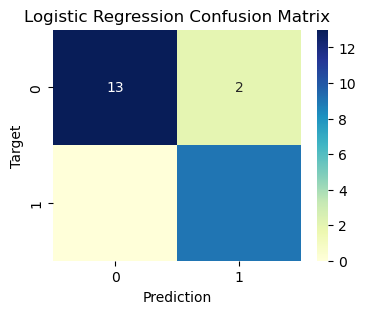

In [28]:
from sklearn.metrics import confusion_matrix

log_cf = confusion_matrix(y_test, y_pred) # create an instance of the confusion matrix

plt.figure(figsize=(4, 3))
sns.heatmap(log_cf, cmap="YlGnBu", annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Logistic Regression Confusion Matrix');

#### Evaluation of the Logistic Regression Classifier

Performance metrics to be evaluated include accuracy, sensitivity, specificity, precision, recall and AUC.

In [29]:
# obtain true and false positive and negative data point

TP = log_cf[1,1] # true positive
TN = log_cf[0,0] # true negative
FP = log_cf[1,0] # False positive
FN = log_cf[0,1] # false negative

# determine the evaluation metrics

log_accuracy = (TP+TN)/(TP+TN+FN+FP)
log_sensitivity = TP / (TP + FN)
log_specificity = TN / (TN + FP)
log_precision = TP / (TP + FP)
log_recall = TP / (TP + FN)

#use model to predict probability that given y value is 1
pred_proba = log_clf.predict_proba(X_test)[::,1]

#calculate AUC of model
from sklearn import metrics
log_auc = metrics.roc_auc_score(y_test, pred_proba)

# create a dictionary for the evaluation metrics
log_metrics = [{'Accuracy': log_accuracy, 'Sensitivity': log_sensitivity, 'Specificity': log_specificity,
                  'Precision': log_precision, 'Recall': log_recall, 'AUC': log_auc}]
log_metrics_df = pd.DataFrame.from_dict(log_metrics) # convert the dictionary to dataframe
log_metrics_df

,Accuracy,Sensitivity,Specificity,Precision,Recall,AUC
0,0.916667,0.818182,1.0,1.0,0.818182,0.918519


### 2. Naives Bayes Classifier

In [30]:
from sklearn.naive_bayes import GaussianNB

# Initialize Gaussian Naive Bayes classifier
nb_clf = GaussianNB()

# Train the model
nb_clf.fit(X_train, y_train)

# Predictions
y_pred = nb_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


#### Confusion Matrix for Naives Bayes

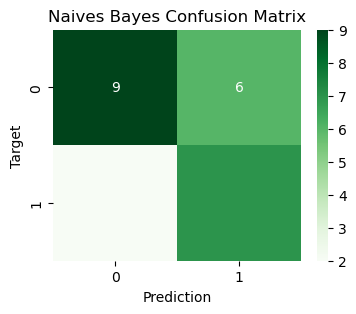

In [31]:
nb_cf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(nb_cf, cmap="Greens", annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Naives Bayes Confusion Matrix');

#### Evaluation of the Naives Bayes Classifier

In [32]:
# obtain true and false positive and negative data point

TP = nb_cf[1,1] # true positive
TN = nb_cf[0,0] # true negative
FP = nb_cf[1,0] # False positive
FN = nb_cf[0,1] # false negative

# determine the evaluation metrics

nb_accuracy = (TP+TN)/(TP+TN+FN+FP)
nb_sensitivity = TP / (TP + FN)
nb_specificity = TN / (TN + FP)
nb_precision = TP / (TP + FP)
nb_recall = TP / (TP + FN)

#use model to predict probability that given y value is 1
pred_proba = nb_clf.predict_proba(X_test)[::,1]

#calculate AUC of model
from sklearn import metrics
nb_auc = metrics.roc_auc_score(y_test, pred_proba)

# create a dictionary for the evaluation metrics
nb_metrics = [{'Accuracy': nb_accuracy, 'Sensitivity': nb_sensitivity, 'Specificity': nb_specificity,
                  'Precision': nb_precision, 'Recall': nb_recall, 'AUC': nb_auc}]
nb_metrics_df = pd.DataFrame.from_dict(nb_metrics) # convert the dictionary to dataframe
nb_metrics_df

,Accuracy,Sensitivity,Specificity,Precision,Recall,AUC
0,0.666667,0.538462,0.818182,0.777778,0.538462,0.911111


### 3. Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
dt_clf = DecisionTreeClassifier()

# Train the classifier on the training data
dt_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


#### Confusion Matrix for Decision Tree

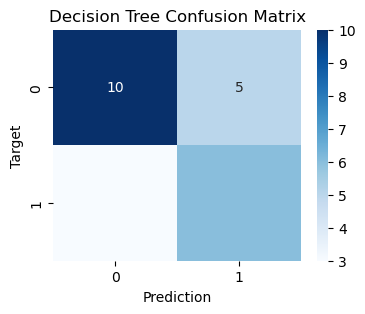

In [34]:
dt_cf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(dt_cf, cmap="Blues", annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Decision Tree Confusion Matrix');

#### Evaluation of the Decision Tree Classifier

In [35]:
# obtain true and false positive and negative data point

TP = dt_cf[1,1] # true positive
TN = dt_cf[0,0] # true negative
FP = dt_cf[1,0] # False positive
FN = dt_cf[0,1] # false negative

# determine the evaluation metrics

dt_accuracy = (TP+TN)/(TP+TN+FN+FP)
dt_sensitivity = TP / (TP + FN)
dt_specificity = TN / (TN + FP)
dt_precision = TP / (TP + FP)
dt_recall = TP / (TP + FN)

#use model to predict probability that given y value is 1
pred_proba = dt_clf.predict_proba(X_test)[::,1]

#calculate AUC of model
from sklearn import metrics
dt_auc = metrics.roc_auc_score(y_test, pred_proba)

# create a dictionary for the evaluation metrics
dt_metrics = [{'Accuracy': dt_accuracy, 'Sensitivity': dt_sensitivity, 'Specificity': dt_specificity,
                  'Precision': dt_precision, 'Recall': dt_recall, 'AUC': dt_auc}]
dt_metrics_df = pd.DataFrame.from_dict(dt_metrics) # convert the dictionary to dataframe
dt_metrics_df

,Accuracy,Sensitivity,Specificity,Precision,Recall,AUC
0,0.666667,0.545455,0.769231,0.666667,0.545455,0.666667


<a id='model_imp'></a>

## Hyperparameter Tuning



#### Tuning of Logistic Regression Model

For logistic regression, some common hyperparameters include regularization strength (C), penalty type (L1 or L2), and solver type.

In [36]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search using grid search techniques
param_grid = {
    'C': [0.1, 1.0, 10.0, 100.0],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Penalty type
    'solver': ['liblinear', 'saga', 'lbfgs']  # Solver type
}

# Initialize logistic regression classifier
lr = LogisticRegression()

# Initialize GridSearchCV with 3-fold cross validation
grid_search = GridSearchCV(lr, param_grid, cv=3, scoring='accuracy')

# Perform hyperparameter search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Predict on the test data with the best model
best_logmodel = grid_search.best_estimator_
y_pred = best_logmodel.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
Test Accuracy: 0.875


The hyperparameter tuning leads to reduction in the accuracy of the model. Therefore, we will only consider the regularization strength (C) parameter.

In [37]:
# write a function to get the C value that will give the best accuracy for the classifier
def get_C(C):
    model = LogisticRegression(C=C, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) # get y predictions
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [38]:
df_list= [] # an empty list to store accuracy for each max_leaf_node value to be tested
C = [0.001, 0.01, 1.0, 10.0, 100.0] # list of leaf_nodes value to be tested

for c in C:
    acc = get_C(c) # obtain the accuracy of each C
    df_dict = {'C': c, 'Accuracy': acc}
    df_list.append(df_dict) 
    
acc_df = pd.DataFrame(df_list, columns=['C', 'Accuracy'])
acc_df

,C,Accuracy
0,0.001,0.666667
1,0.010,0.791667
2,1.000,0.916667
3,10.000,0.916667
4,100.000,0.833333


The best model performance was obtained at C = 1.0 or C = 10.0. We will be choosing C = 1.0 for our regularization strength as small values of C are preferred for a better model.

#### Tuning of Naive Bayes Model

- Hyperparameter tuning for a Naive Bayes classifier typically involves exploring different values for the smoothing parameter.
- Var_smoothing (Variance smoothing) parameter specifies the portion of the largest variance of all features to be added to variances for stability of calculation.
- Hyperparameter tuning can be carried out using Grid search from sklearn

In [39]:
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=gnb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_train)

gs_NB.fit(Data_transformed, y_train);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


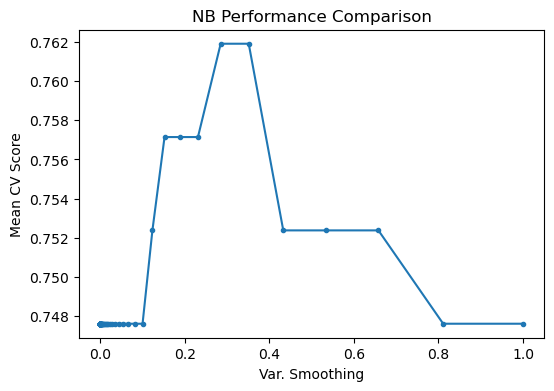

In [40]:
# visualize the performance of the model at different var_smoothing

results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

plt.figure(figsize=(6, 4))
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [41]:
# predict the model on the test dataset

test_transformed = PowerTransformer().fit_transform(X_test) # transform the test dataset
y_pred = gs_NB.predict(test_transformed)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7083333333333334


The accuracy of the model has been improved from 66.67% to 70.8% after tuning

#### Tuning of Decision Tree Classifier

The hyperparameter to tune in decision tree classification model include:
- criterion: The function to measure the quality of a split.
- max_depth: The maximum depth of the tree.
- min_samples_split: The minimum number of samples required to split an internal node.
- min_samples_leaf: The minimum number of samples required to be at a leaf node.

In [42]:
# Create a decision tree classifier
dt_clf = DecisionTreeClassifier()

# Define the hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf':[5, 10, 20, 50, 100]
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best model to make predictions
best_dt_clf = grid_search.best_estimator_
y_pred = best_dt_clf.predict(X_test)

# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5}
Best Score: 0.7142857142857143
Test Accuracy: 0.6666666666666666


The accuracy of the tuned model was observed to be smaller compared to the initial model. This means the combination of hyperparameters we are tweaking are not suitable for the model.

However, one major parameter of decision tree classifier that can be tuned to improve the model is max_leaf_nodes. This parameter is set to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths.


In [43]:
# write a function to get the max_leaf_nodes value that will give the best accuracy for the classifier
def get_max_leaf(max_leaf):
    model = DecisionTreeClassifier(random_state=10, max_leaf_nodes=max_leaf)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) # get y predictions
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

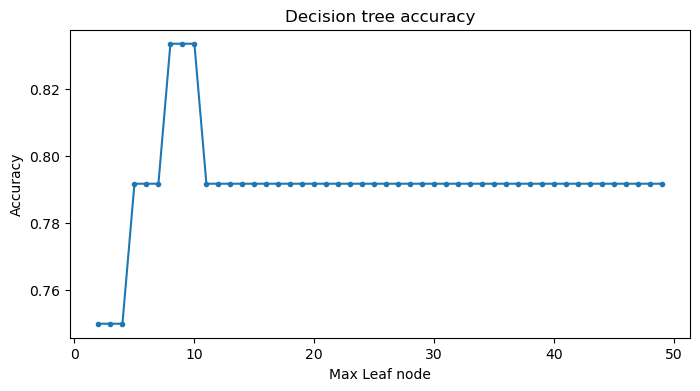

In [44]:
df_list= [] # an empty list to store accuracy for each max_leaf_node value to be tested
leaf_nodes = range(2, 50) # list of leaf_nodes value to be tested

for node in leaf_nodes:
    acc = get_max_leaf(node) # obtain the accuracy of each node
    df_dict = {'Max_Leaf_Node': node, 'Accuracy': acc}
    df_list.append(df_dict) 
    
acc_df = pd.DataFrame(df_list, columns=['Max_Leaf_Node', 'Accuracy'])

# plot the accuracy of the model at different max leaf nodes
plt.figure(figsize=(8, 4))
plt.plot(acc_df['Max_Leaf_Node'], acc_df['Accuracy'], marker = '.')    
plt.xlabel('Max Leaf node')
plt.ylabel("Accuracy")
plt.title("Decision tree accuracy")
plt.show()

As observed from the plot above, the highest accuracy was obtained at max leaf nodes of 8, 9, or 10.

<a id='model_reeval'></a>

## Evaluation of Tuned Models

We will re-evaluate the tuned model in terms of accuracy, sensitivity, specificity, precision, recall and AUC.

#### Logistic Regression

In [45]:
# using the tuned hyperparameters to train logistic regression
tune_log_model = LogisticRegression(C=1.0) 
tune_log_model.fit(X_train, y_train)

# Predict on the test data
y_pred = tune_log_model.predict(X_test)

# Confusion Matrix for tuned logistic regression
log_cf = confusion_matrix(y_test, y_pred)

# obtain true and false positive and negative data point

TP = log_cf[1,1] # true positive
TN = log_cf[0,0] # true negative
FP = log_cf[1,0] # False positive
FN = log_cf[0,1] # false negative

# determine the evaluation metrics

log_accuracy = (TP+TN)/(TP+TN+FN+FP)
log_sensitivity = TP / (TP + FN)
log_specificity = TN / (TN + FP)
log_precision = TP / (TP + FP)
log_recall = TP / (TP + FN)

#use model to predict probability that given y value is 1
pred_proba = tune_log_model.predict_proba(X_test)[::,1]

#calculate AUC of model
log_auc = metrics.roc_auc_score(y_test, pred_proba)

# create a dictionary for the evaluation metrics
log_metrics = [{'Accuracy': log_accuracy, 'Sensitivity': log_sensitivity, 'Specificity': log_specificity,
                  'Precision': log_precision, 'Recall': log_recall, 'AUC': log_auc}]
log_metrics_df = pd.DataFrame.from_dict(log_metrics) # convert the dictionary to dataframe
log_metrics_df

,Accuracy,Sensitivity,Specificity,Precision,Recall,AUC
0,0.916667,0.818182,1.0,1.0,0.818182,0.918519


#### Naives Bayes

In [46]:
# train naives bayes using the tuned hyperparameter

gs_NB.fit(Data_transformed, y_train)
test_transformed = PowerTransformer().fit_transform(X_test) # transform the test dataset
y_pred = gs_NB.predict(test_transformed)

# confusion matrix for tuned naive bayes
nb_cf = confusion_matrix(y_test, y_pred)

# obtain true and false positive and negative data point

TP = nb_cf[1,1] # true positive
TN = nb_cf[0,0] # true negative
FP = nb_cf[1,0] # False positive
FN = nb_cf[0,1] # false negative

# determine the evaluation metrics

nb_accuracy = (TP+TN)/(TP+TN+FN+FP)
nb_sensitivity = TP / (TP + FN)
nb_specificity = TN / (TN + FP)
nb_precision = TP / (TP + FP)
nb_recall = TP / (TP + FN)

#use model to predict probability that given y value is 1
pred_proba = gs_NB.predict_proba(test_transformed)[::,1]

#calculate AUC of model
nb_auc = metrics.roc_auc_score(y_test, pred_proba)

# create a dictionary for the evaluation metrics
nb_metrics = [{'Accuracy': nb_accuracy, 'Sensitivity': nb_sensitivity, 'Specificity': nb_specificity,
                  'Precision': nb_precision, 'Recall': nb_recall, 'AUC': nb_auc}]
nb_metrics_df = pd.DataFrame.from_dict(nb_metrics) # convert the dictionary to dataframe
nb_metrics_df

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


,Accuracy,Sensitivity,Specificity,Precision,Recall,AUC
0,0.708333,0.571429,0.9,0.888889,0.571429,0.888889


In [47]:
# training the model using the tuned hyperparameter
tuned_dt = DecisionTreeClassifier(random_state=10, max_leaf_nodes=10)
tuned_dt.fit(X_train, y_train)

# Predict on the test data
y_pred = tuned_dt.predict(X_test)

# confusion matrix for tuned naive bayes
dt_cf = confusion_matrix(y_test, y_pred)

# obtain true and false positive and negative data point

TP = dt_cf[1,1] # true positive
TN = dt_cf[0,0] # true negative
FP = dt_cf[1,0] # False positive
FN = dt_cf[0,1] # false negative

# determine the evaluation metrics

dt_accuracy = (TP+TN)/(TP+TN+FN+FP)
dt_sensitivity = TP / (TP + FN)
dt_specificity = TN / (TN + FP)
dt_precision = TP / (TP + FP)
dt_recall = TP / (TP + FN)

#use model to predict probability that given y value is 1
pred_proba = tuned_dt.predict_proba(X_test)[::,1]

#calculate AUC of model
from sklearn import metrics
dt_auc = metrics.roc_auc_score(y_test, pred_proba)

# create a dictionary for the evaluation metrics
dt_metrics = [{'Accuracy': dt_accuracy, 'Sensitivity': dt_sensitivity, 'Specificity': dt_specificity,
                  'Precision': dt_precision, 'Recall': dt_recall, 'AUC': dt_auc}]
dt_metrics_df = pd.DataFrame.from_dict(dt_metrics) # convert the dictionary to dataframe
dt_metrics_df

,Accuracy,Sensitivity,Specificity,Precision,Recall,AUC
0,0.833333,0.777778,0.866667,0.777778,0.777778,0.777778


<a id='model_comp'></a>

## Comparing Models Performance

In [48]:
models = {'Classifiers': ['Logistic Regression', 'Naive Bayes Classifier', 'Decision Tree'], 
              'Accuracy': [log_accuracy, nb_accuracy, dt_accuracy],
              'Sensitivity': [log_sensitivity, nb_sensitivity, dt_sensitivity],
              'Specificity': [log_specificity, nb_specificity, dt_specificity],
              'Precision': [log_precision, nb_precision, dt_precision],
              'Recall': [log_recall, nb_recall, dt_recall], 
              'AUC': [log_auc, nb_auc, dt_auc]}

# convert the model_perf dictionary to dataframe
models = pd.DataFrame.from_dict(models)
models

,Classifiers,Accuracy,Sensitivity,Specificity,Precision,Recall,AUC
0,Logistic Regression,0.916667,0.818182,1.000000,1.000000,0.818182,0.918519
1,Naive Bayes Classifier,0.708333,0.571429,0.900000,0.888889,0.571429,0.888889
2,Decision Tree,0.833333,0.777778,0.866667,0.777778,0.777778,0.777778


<a id='conclusion'></a>
## Conclusion

- Three classification models; logistic regression, naive bayes classifier, decision tree classifier were developed to classify patients to grade I and grade II meningioma category.
- Logistic regression is the best performing model. It has the best accuracy, sensitivity, specificity, precision, recall and AUC.
- Tuning of hyperparameters improve the performance of naive bayes and decision tree.